In [1]:
import sys
sys.path.append("../../")
print(sys.path)

from attack import *
FLAGS.input_dir = "../../../official_data/dev_data/"
FLAGS.output_dir = "../../../test_data/NonTargetAttackResult/"
FLAGS.weight_path = "../../IJCAI19/weight/"
FLAGS.batch_size = 4

from IJCAI19.model.EmbeddedAttackModel import PredictBatch
OfficialModel.WEIGHT_DIR = FLAGS.weight_path

['C:\\ProgramData\\Miniconda3\\python36.zip', 'C:\\ProgramData\\Miniconda3\\DLLs', 'C:\\ProgramData\\Miniconda3\\lib', 'C:\\ProgramData\\Miniconda3', '', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\ywilliam\\.ipython', '../../']


Using TensorFlow backend.


In [2]:
# M = GradSmoothMomentumIterativeMethod
TARGET_ATTACK = False
from cleverhans.attacks import FastGradientMethod
M = FastGradientMethod
#non targeted with guessed label
attack_params = {"ep_ratio": 0.1, "nb_iter": 10, "target":TARGET_ATTACK}
attack(M, attack_params, targetlabel=TARGET_ATTACK)

{'ep_ratio': 0.1, 'nb_iter': 10, 'y': <tf.Tensor 'output:0' shape=(?, 110) dtype=float32>, 'eps': 25.5, 'eps_iter': 2.55, 'clip_min': 0, 'clip_max': 255}


C:\ProgramData\Miniconda3\lib\site-packages\cleverhans\attacks\__init__.py:405: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/inception_v1/inception_v1.ckpt
INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/resnet_v1_50/model.ckpt-49800


In [3]:
#Validation
#copy dev.csv
batch_shape = [FLAGS.batch_size, FLAGS.image_height, FLAGS.image_width, 3]
open(FLAGS.output_dir+'dev.csv', "wb").write(open(FLAGS.input_dir+'dev.csv', "rb").read())
img_loader = ImageLoader(FLAGS.output_dir, batch_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
name = 'vgg_16'
T3 = TargetModel(batch_shape, FLAGS.num_classes, name=name)
Yp, topK, acc = PredictBatch(T3, img_loader)

INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/vgg_16/vgg_16.ckpt
Predict  runs: 19.25 s
batchs 28 Accuracy 0.13636363636363635


In [4]:
#calc
all_shape = (110, batch_shape[1], batch_shape[2], batch_shape[3])
img_loader = ImageLoader(FLAGS.input_dir, all_shape, targetlabel=TARGET_ATTACK, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
_, X, Y = next(img_loader)
img_loader = ImageLoader(FLAGS.output_dir, all_shape, targetlabel=TARGET_ATTACK, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
_, Xadv, Yadv = next(img_loader)

print(X.shape, Xadv.shape, Y.shape, Yadv.shape)
print(" mean L2:", calc_l2(X, Xadv))
print("Score and succ:", calc_score(X, Xadv, Y.argmax(1), Yp, target=TARGET_ATTACK))

(110, 299, 299, 3) (110, 299, 299, 3) (110, 110) (110, 110)
 mean L2: 39.65470353580062
Score: 51.74616395732934


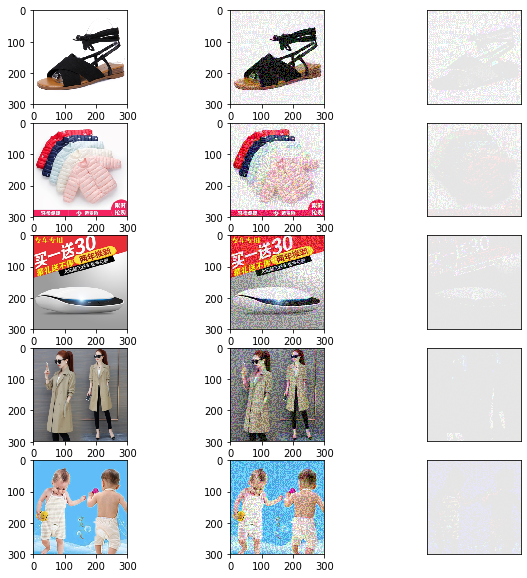

In [8]:
plot_images(X, Xadv)

In [7]:
# test_dir = "C:\\users\\ywilliam\\docker\\out_data\\"
# batch_shape = [FLAGS.batch_size, FLAGS.image_height, FLAGS.image_width, 3]
# img_loader = ImageLoader(test_dir, batch_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
# T3 = TargetModel(batch_shape, FLAGS.num_classes, name=name)
# Yp, topK, acc = PredictBatch(T3, img_loader)

# #calc
# all_shape = (110, batch_shape[1], batch_shape[2], batch_shape[3])
# img_loader = ImageLoader(FLAGS.input_dir, all_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
# _, X, Y = next(img_loader)
# img_loader = ImageLoader(test_dir, all_shape, targetlabel=False, label_size=FLAGS.num_classes, format='png', label_file='dev.csv')
# _, Xadv, Yadv = next(img_loader)

# print(X.shape, Xadv.shape, Y.shape, Yadv.shape)
# print(" mean L2:", calc_l2(X, Xadv))
# print("Score:", calc_score(X, Xadv, Y.argmax(1), Yp))

INFO:tensorflow:Restoring parameters from ../../IJCAI19/weight/vgg_16/vgg_16.ckpt
Predict  runs: 17.15 s
batchs 28 Accuracy 0.20909090909090908
(110, 299, 299, 3) (110, 299, 299, 3) (110, 110) (110, 110)
 mean L2: 39.65809868672317
Score: 58.36924958491722
